# Projeto - Relatório de fechamento de mercado por e-mail.


### Desafio:

* Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar.

### Passo a passo:

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Pegar dados do Ibovespa e do Dólar no Yahoo Finance.
   
   **Passo 3** - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
   
   **Passo 4** - Calcular o retorno diário, mensal e anual.
   
   **Passo 5** - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto  anexado no e-mail.
   
   **Passo 6** - Fazer os gráficos dos ativos.
   
   **Passo 7** - Enviar o e-mail.

In [ ]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

In [ ]:
ativos = ["^BVSP", "BRL=X"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close             Close                High            \
               BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X     ^BVSP   
Date                                                                   
2022-04-04    4.6572  121280.0  4.6572  121280.0  4.670100  121570.0   
2022-04-05    4.5938  118885.0  4.5938  118885.0  4.669100  121628.0   
2022-04-06    4.6507  118228.0  4.6507  118228.0  4.712600  118885.0   
2022-04-07    4.7152  118862.0  4.7152  118862.0  4.769900  119247.0   
2022-04-08    4.7521  118322.0  4.7521  118322.0  4.791300  118868.0   
...              ...       ...     ...       ...       ...       ...   
2023-03-28    5.1971  101185.0  5.1971  101185.0  5.197700  101559.0   
2023-03-29    5.1644  101793.0  5.1644  101793.0  5.182300  102213.0   
2023-03-30    5.1342  103713.0  5.1342  103713.0  5.155928  104085.0   
2023-03-31    5.0927  101882.0  5.0927  101882.0  5.103300  104041.0   
2023-04-03    5.0623  101506.0  5.0623  101506.0  5.075500  101916.0   

                 Low              Open           Volume              
               BRL=X     ^BVSP   BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                 
2022-04-04  4.604057  120754.0  4.6572  121569.0      0   8812500.0  
2022-04-05  4.575500  118794.0  4.5938  121279.0      0  11788300.0  
2022-04-06  4.647900  116791.0  4.6507  118885.0      0  13410800.0  
2022-04-07  4.690400  117509.0  4.7152  118226.0      0  11520100.0  
2022-04-08  4.707518  117487.0  4.7521  118861.0      0  11225800.0  
...              ...       ...     ...       ...    ...         ...  
2023-03-28  5.147900   99488.0  5.1971   99672.0      0  13500100.0  
2023-03-29  5.131730  100248.0  5.1644  101185.0      0  12456100.0  
2023-03-30  5.077300  101796.0  5.1342  101796.0      0  14901600.0  
2023-03-31  5.055200  101476.0  5.0927  103714.0      0  15111200.0  
2023-04-03  5.036216  100651.0  5.0623  101883.0      0  12794800.0  

[261 rows x 12 columns]

In [ ]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ["DOLAR", "IBOVESPA"]
dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,DOLAR,IBOVESPA
Date,,
2022-04-04,4.6572,121280.0
2022-04-05,4.5938,118885.0
2022-04-06,4.6507,118228.0
2022-04-07,4.7152,118862.0
2022-04-08,4.7521,118322.0
...,...,...
2023-03-28,5.1971,101185.0
2023-03-29,5.1644,101793.0
2023-03-30,5.1342,103713.0


In [ ]:
dados_fechamento_mensal = dados_fechamento.resample("M").last()
dados_fechamento_anual = dados_fechamento.resample("Y").last()
dados_fechamento_anual

,DOLAR,IBOVESPA
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.0623,101506.0


In [ ]:
retorno_ano = dados_fechamento_anual.pct_change().dropna()
retorno_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_dia = dados_fechamento.pct_change().dropna()
retorno_dia

,DOLAR,IBOVESPA
Date,,
2022-04-05,-0.013613,-0.019748
2022-04-06,0.012386,-0.005526
2022-04-07,0.013869,0.005363
2022-04-08,0.007826,-0.004543
2022-04-11,-0.011363,-0.011570
...,...,...
2023-03-28,-0.009151,0.015200
2023-03-29,-0.006292,0.006009
2023-03-30,-0.005848,0.018862


In [ ]:
retorno_dia_dolar = retorno_dia.iloc[-1, 0]
retorno_dia_ibovespa = retorno_dia.iloc[-1, 1]

retorno_mes_dolar = retorno_mes.iloc[-1, 0]
retorno_mes_ibovespa = retorno_mes.iloc[-1, 1]

retorno_ano_dolar = retorno_ano.iloc[-1, 0]
retorno_ano_ibovespa = retorno_ano.iloc[-1, 1]

retorno_ano_dolar

-0.038828078600089855

In [ ]:
retorno_dia_dolar = round(retorno_dia_dolar * 100, 2)
retorno_dia_ibovespa = round(retorno_dia_ibovespa * 100, 2)

retorno_mes_dolar = round(retorno_mes_dolar * 100, 2)
retorno_mes_ibovespa = round(retorno_mes_ibovespa * 100, 2)

retorno_ano_dolar = round(retorno_ano_dolar * 100, 2)
retorno_ano_ibovespa = round(retorno_ano_ibovespa * 100, 2)

retorno_mes_ibovespa

-0.37

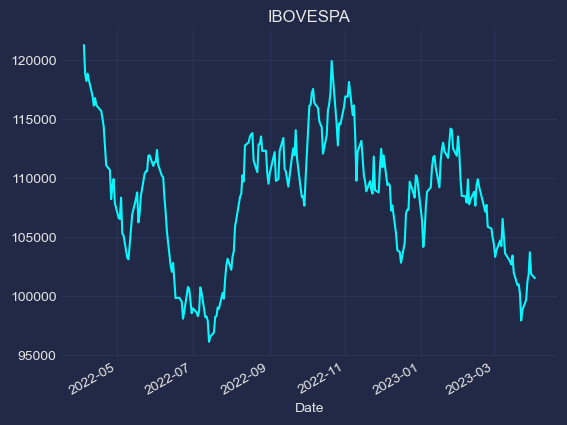

In [ ]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'IBOVESPA', use_index = True, legend = False)

plt.title("IBOVESPA")

plt.savefig('IBOVESPA.png', dpi = 300)

plt.show()

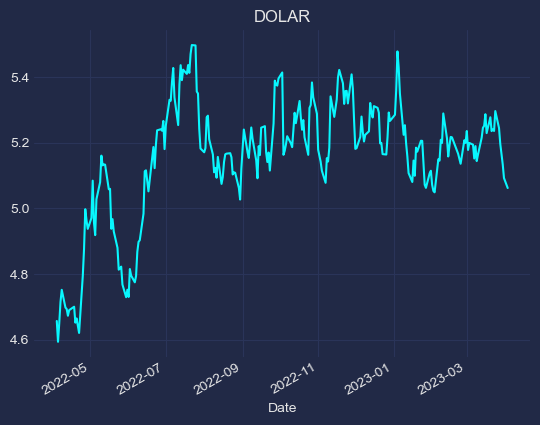

In [ ]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'DOLAR', use_index = True, legend = False)

plt.title("DOLAR")

plt.savefig('DOLAR.png', dpi = 300)

plt.show()

In [ ]:
import os
from dotenv import load_dotenv

In [ ]:
load_dotenv()

True

In [ ]:
senha = os.environ.get("senha")
email = 'seemail@gmail.com'

In [ ]:
msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com o Python"
msg['From'] = 'seuemail@gmail.com'
msg['To'] = 'teuemail@gmail', 'colocaremail@hotmail.com'

msg.set_content(f'''Prezado Professor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_ano_ibovespa}%, 
enquanto no mês a rentabilidade é de {retorno_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibovespa}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.


Abs,

O melhor estagiário do mundo

''')

In [ ]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [ ]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)